In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def vel (y, flux, vol, tau, bomb, n):
    tcambio = 630                             #Tiempo en que cambia el medio
    dt = 1/(60.0*2)
    t = n*dt
    nex = 0
    v = 0
    if t<570 or t>tcambio + 4*1/60.0:         #Crecimiento normal
        if bomb[n] == 0:
            v = y/tau
            if y >0.40:                       #Threshold
                nex = 1
            else:
                nex = 0
        else:
            v = y/tau - flux/vol * y
            if bomb[n-1] == 0:
                nex = 1
            elif bomb[n-1] == 1:
                nex = 0
    elif t < tcambio:                         #tiempo muerto
        v = y/tau
        nex = 0
    elif t >= tcambio and t<= tcambio + (4*1/60.0):
        v = y/tau -flux/vol * y
        nex = 1 
    return v, nex#funcion que devuelve Y punto

In [3]:
def RK (listY, listV, listB, Flux, Vol, Tau, listT, dt, tmax):
    n=0
    nex = 0
    while (n < tmax/dt-1):
        ytest = listY[n]
        vtest = listV[n]
        Btest = listB
        
        K1 = vtest*dt
        
        ytest = listY[n] + 0.5*K1
        vtest, nex = vel(ytest, Flux, Vol, Tau, Btest, n)
        
        K2 = vtest*dt
        
        ytest = listY[n] + 0.5*K2
        vtest, nex = vel(ytest, Flux, Vol, Tau, Btest, n)
        
        K3 = vtest*dt
        
        ytest = listY[n] + 0.5*K3
        vtest, nex = vel(ytest, Flux, Vol, Tau, Btest, n)
        
        K4 = vtest*dt
        
        K = (K4 + 2*K3 + 2*K2 + K1)/6.0
        
        listY[n+1] = listY[n] + K
        listV [n+1], nex = vel(listY[n+1], Flux, Vol, Tau, Btest, n)
        listB[n+1] = nex
        
        n = n+1

In [22]:
tmax = 2000                    #tiempo de simulacion
dt=1/(60.0*2)                  #paso (0.5 segundos)

listY = zeros(tmax/dt)         #Voltaje 
listV = zeros(tmax/dt)         #Velocidad de crecimiento
listT = arange(0,tmax,dt)      #Tiempo
listB = zeros(tmax/dt)         #bomba prendida o no


Y0 = 0.3                       #Inicial segun datos
fl = 0.7*60                    #flujo medido
vo = 1.5                       #Vol tubos 
ta = 130.0                     #tiempo duplicacion medido
nex = 0                        #bomba prendida en el siguiente  
listY[0] = Y0
listV[0], nex = vel(listY[0], fl, vo, ta, listB, 0)

In [23]:
RK(listY, listV, listB, fl, vo, ta, listT, dt, tmax)

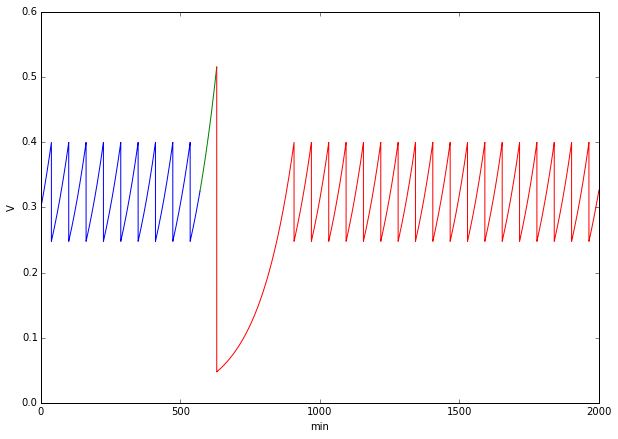

In [24]:
figure(figsize=(10,7))
plot(listT[0:570/dt], listY[0:570/dt])
plot(listT[570/dt:630/dt], listY[570/dt:630/dt])
plot(listT[630/dt:2000/dt-1], listY[630/dt:2000/dt-1])
xlabel("min")
ylabel("V")

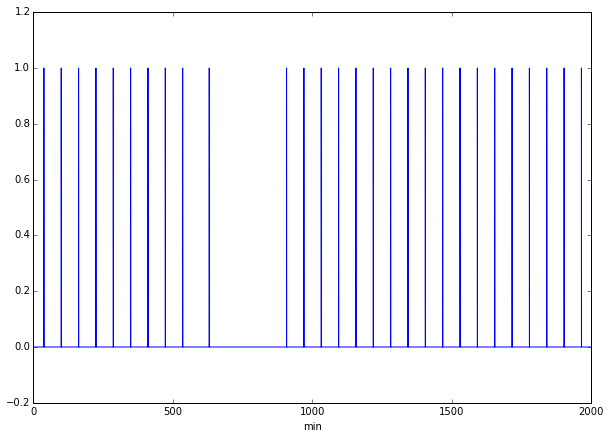

In [25]:
figure(figsize=(10,7))
plot(listT,listB)
ylim(-0.2,1.2)
xlabel("min")

In [26]:
def vgal(gal, bomb, time, n):
    galp = 0.0
    flux = 0.7*60
    vol = 1.5
    if time[n] > 630.0 and bomb[n] == 1:
        galp = (20.0 - gal/vol)*flux
    return galp

In [27]:
def RKgal(listGal, listGalp, listB, listT, dt, tmax):
    n=0
    while (n < tmax/dt-1):
        ytest = listGal[n]
        vtest = listGalp[n]
        Btest = listB
        
        K1 = vtest*dt
        
        ytest = listGal[n] + 0.5*K1
        vtest = vgal(ytest, Btest, listT, n)
        
        K2 = vtest*dt
        
        ytest = listGal[n] + 0.5*K2
        vtest = vgal(ytest, Btest, listT, n)
        
        K3 = vtest*dt
        
        ytest = listGal[n] + 0.5*K3
        vtest = vgal(ytest, Btest, listT, n)
        
        K4 = vtest*dt
        
        K = (K4 + 2*K3 + 2*K2 + K1)/6.0
        
        listGal[n+1] = listGal[n] + K
        listGalp [n+1] = vgal(listGal[n+1], Btest, listT, n)
        
        n = n+1
        

In [28]:
listGal = zeros(tmax/dt)         #Cantidad Galactosa
listGalp =  zeros(tmax/dt)       #dGAL/dt        

listGal[0] = 0.0
listGalp[0] = vgal(listGal[0], listB, listT, 0)

In [29]:
RKgal(listGal, listGalp, listB, listT, dt, tmax)

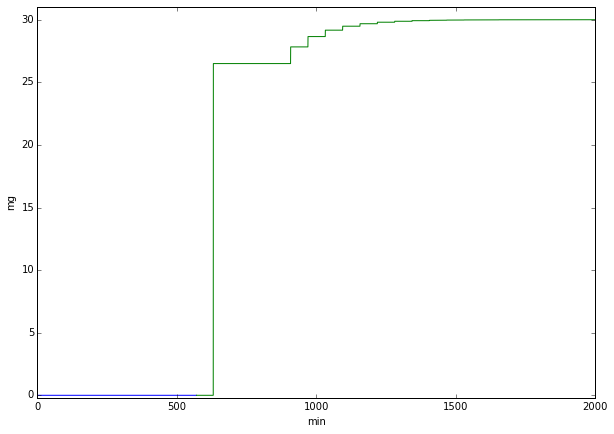

In [30]:
figure(figsize=(10,7))
ylim(-0.2,31)
plot(listT[0:570/dt], listGal[0:570/dt])
plot(listT[570/dt:2000/dt-1], listGal[570/dt:2000/dt-1])
xlabel("min")
ylabel("mg")